In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 데이터 불러오기

In [4]:
stock_df = pd.read_csv("../00_data/stock_daily_prices.csv")
stock_df["Date"] = pd.to_datetime(stock_df["Date"])
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2159 non-null   datetime64[ns]
 1   AAPL    2159 non-null   float64       
 2   BA      2159 non-null   float64       
 3   T       2159 non-null   float64       
 4   MGM     2159 non-null   float64       
 5   AMZN    2159 non-null   float64       
 6   IBM     2159 non-null   float64       
 7   TSLA    2159 non-null   float64       
 8   GOOG    2159 non-null   float64       
 9   sp500   2159 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 168.8 KB


In [26]:
def plot_method(stock_name):
    plt.plot(stock_df["Date"], stock_df[stock_name], label=stock_name, color="b")
    plt.title(f"{stock_name} stock price", fontsize = 16)
    plt.xlabel("Date", fontsize= 12)
    plt.ylabel("price (usd)", fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

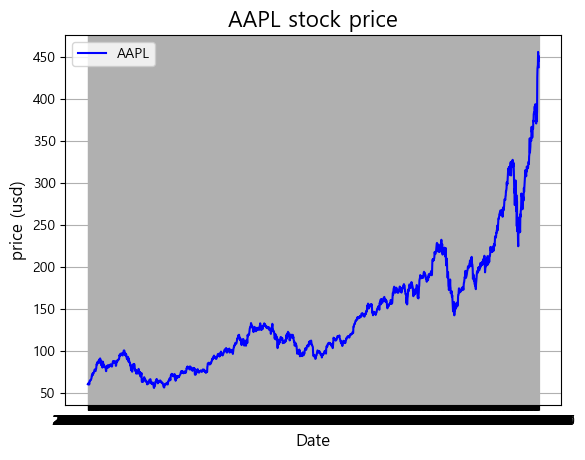

In [30]:
plot_method("AAPL")

## 여러 종목의 주가를 비교(여러 선 그래프)
여러 주식 종목 (AAPL, TSLA, AMZN)의 주가를 한 그래프에 그려 비교해본다.

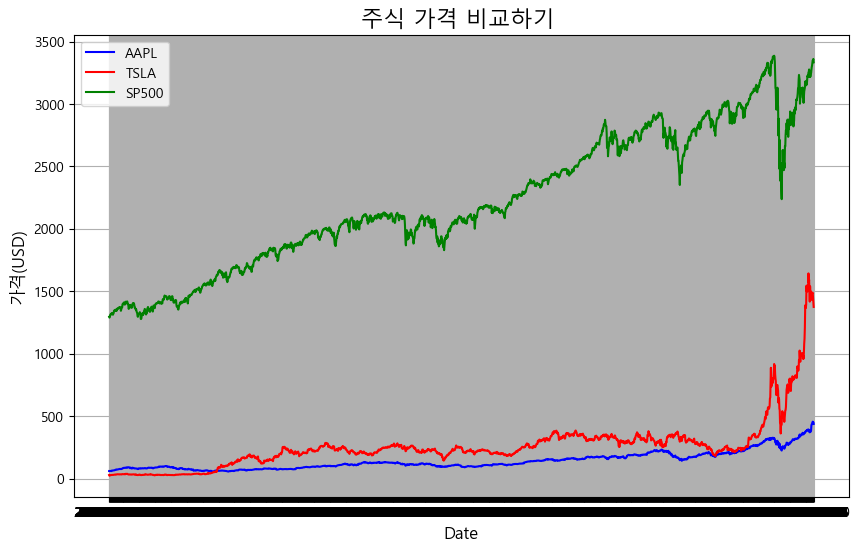

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(stock_df["Date"], stock_df["AAPL"], label="AAPL", color="b")
plt.plot(stock_df['Date'], stock_df["TSLA"], label="TSLA", color="r")
# plt.plot(stock_df["Date"], stock_df["AMZN"], label="AMZN", color="g")
plt.plot(stock_df["Date"], stock_df["sp500"], label="SP500", color="g")
plt.rc('font', family='Malgun Gothic')
plt.title("주식 가격 비교하기 ", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("가격(USD)", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

## Tsla 주가의 분포를 나타내는 히스토그램

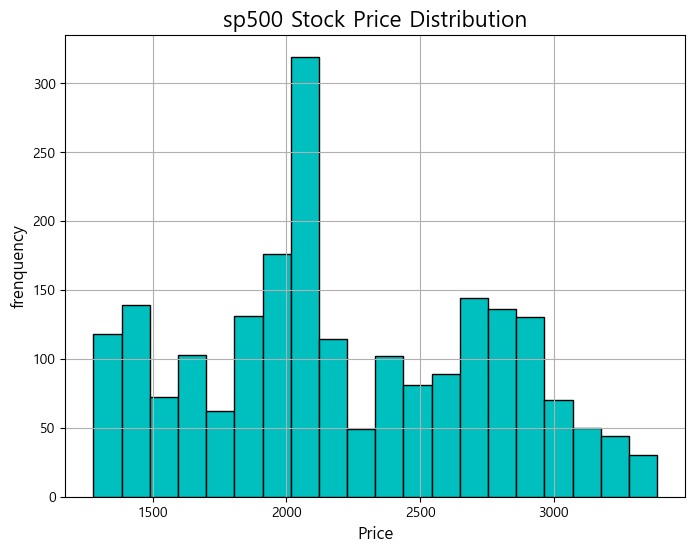

In [35]:
plt.figure(figsize=(8, 6))
# hist  = 히스토그램을 나타내는 메서드
plt.hist(stock_df["sp500"], bins=20, color="c", edgecolor="black")

plt.title("sp500 Stock Price Distribution", fontsize=16)
plt.xlabel("Price", fontsize=12)
plt.ylabel("frenquency", fontsize=12)
plt.grid(True)
plt.show()

## 막대 그래프 : 주식 상승과 하락 시각화
막대 그래프는 카테고리별 데이터를 시각화하는데 좋다. <br>
주식의 일일 변동률(상승/하락)을 시각화

c:\Users\psc12\miniconda3\envs\dataAnalysis\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


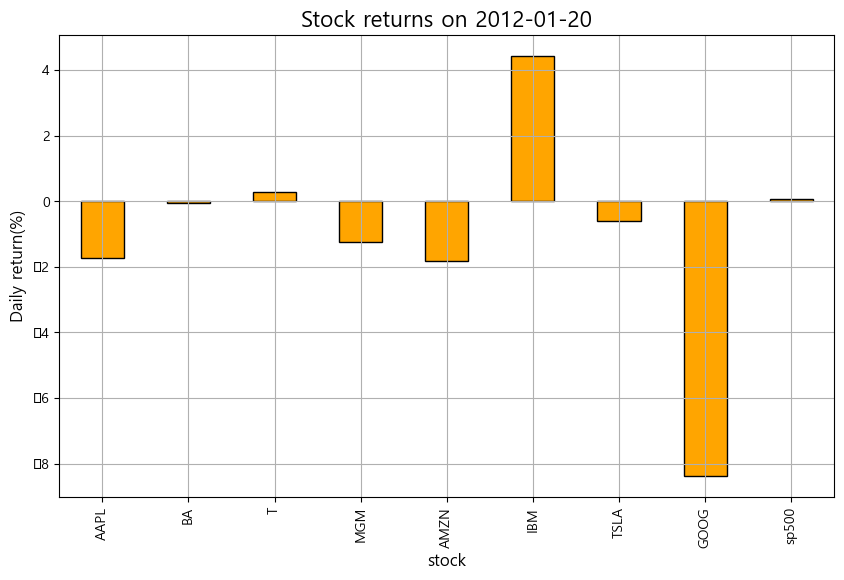

In [19]:
# 일일 변동률 계산
daily_returns = stock_df.set_index("Date").pct_change()*100

specific_day_returns = daily_returns.loc["2012-01-20"]

plt.figure(figsize=(10,6))
specific_day_returns.plot(kind="bar", color="orange", edgecolor="black")

plt.title("Stock returns on 2012-01-20", fontsize=16)
plt.xlabel("stock", fontsize=12)
plt.ylabel("Daily return(%)", fontsize=12)
plt.grid(True)
plt.show()

## 히트맵을 통한 상관관계 분석

c:\Users\psc12\miniconda3\envs\dataAnalysis\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\psc12\miniconda3\envs\dataAnalysis\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


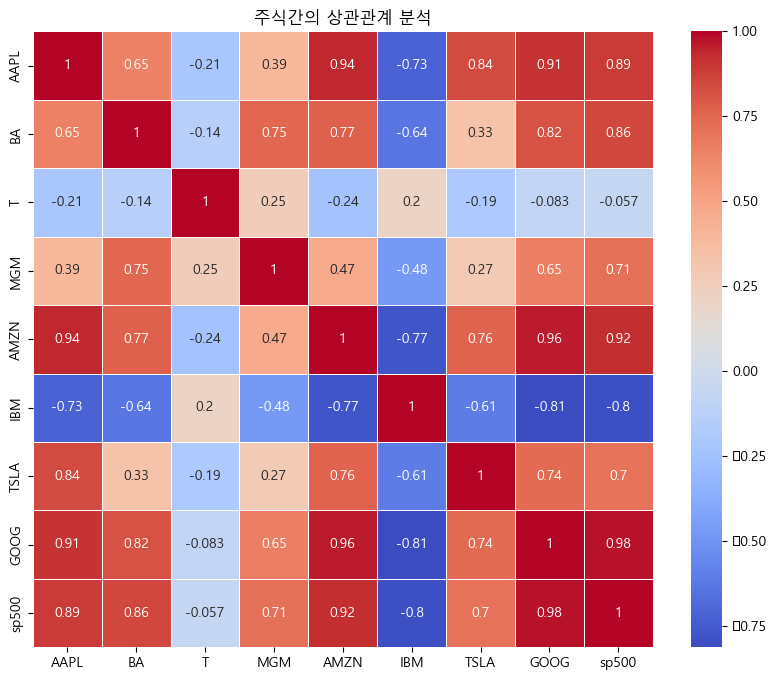

In [24]:
stock_df = pd.read_csv("../00_data/stock_daily_prices.csv")
plt.rc('font', family='Malgun Gothic')

data_without_date = stock_df.drop(columns=["Date"])

corr_matrix = data_without_date.corr()
plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("주식간의 상관관계 분석")
plt.show()